In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix

# the conversion of Excel to CSV
data= pd.read_excel (r'C:/Users/Raghu/OneDrive/Documents/Fall 2020/AI project/project/Autism.xlsx')
data.to_csv (r'C:/Users/Raghu/OneDrive/Documents/Fall 2020/AI project/project/Autism.csv', index = None, header=True)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                704 non-null object
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null int64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: int64(11), object(10)
memory usage: 115.6+ KB


In [3]:
#Return a tuple representing the dimensionality of the DataFrame.
data.shape

(704, 21)

In [4]:
# print out a description of the dataframe
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [5]:
# Total number of records
n_records = len(data.index)

# TODO: Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# TODO: Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))
print("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))

Total number of records: 704
Individuals diagonised with ASD: 189
Individuals not diagonised with ASD: 515
Percentage of individuals diagonised with ASD: 26.85%


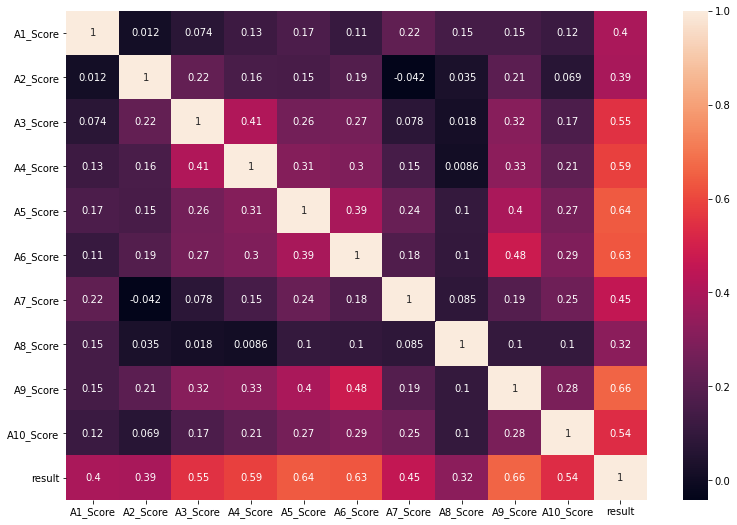

In [6]:
## Checking correlation between the features
plt.figure(figsize=(13, 9))
corr = data.corr()
sea.heatmap(corr,annot = True)

In [7]:
data.replace("?",np.nan,inplace=True)

In [8]:
data.isnull().any()

A1_Score           False
A2_Score           False
A3_Score           False
A4_Score           False
A5_Score           False
A6_Score           False
A7_Score           False
A8_Score           False
A9_Score           False
A10_Score          False
age                 True
gender             False
ethnicity           True
jundice            False
austim             False
contry_of_res      False
used_app_before    False
result             False
age_desc           False
relation            True
Class/ASD          False
dtype: bool

In [9]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

age           2
ethnicity    95
relation     95
dtype: int64

In [10]:
data['age'].fillna(data['age'].mean(), inplace = True)
print(data.isnull().sum())

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 0
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64


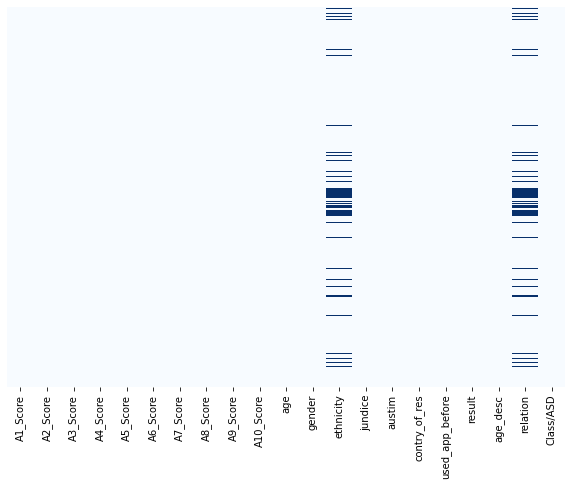

In [11]:
import seaborn as sea
plt.figure(figsize=(10,7))
sea.heatmap(data.isnull(),cmap="Blues",cbar=False,yticklabels=False)

In [12]:
#since i have lot of missing categorical values i would like to drop them
data.dropna(inplace=True)
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,...,f,Pasifika,no,no,Australia,no,10,'18 and more',Self,YES
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
702,1,0,0,1,1,0,1,0,1,1,...,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO


In [13]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES


In [14]:
data.drop(['age_desc','used_app_before'],axis=1,inplace=True)
data.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',6,Self,NO
5,1,1,1,1,1,0,1,1,1,1,36.0,m,Others,yes,no,'United States',9,Self,YES


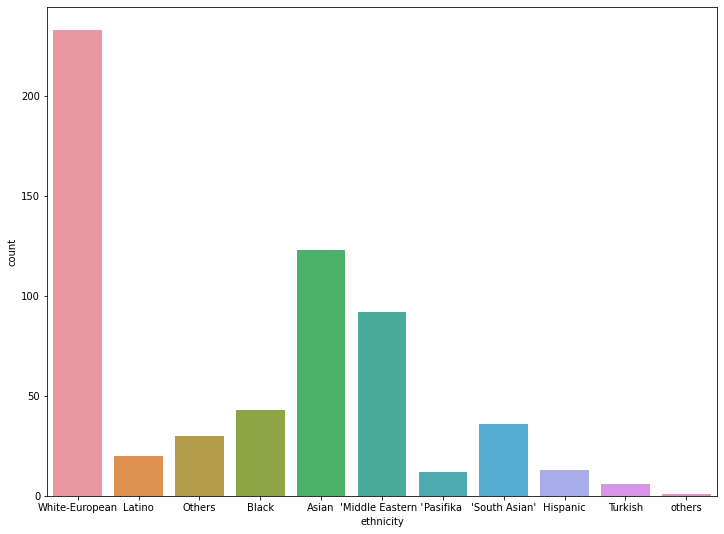

In [15]:
plt.figure(figsize=(12,9))
sea.countplot(x='ethnicity',data=data)

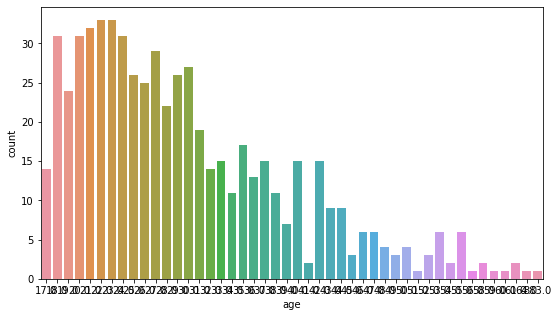

In [16]:
plt.figure(figsize=(9, 5))
sea.countplot(x='age',data=data )

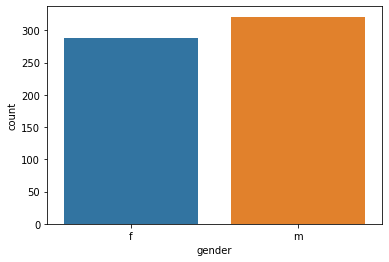

In [17]:
sea.countplot(x='gender',data=data )

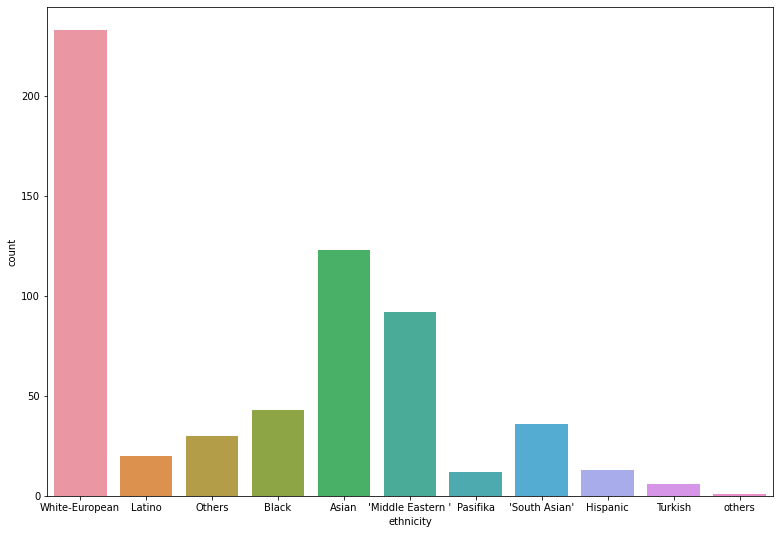

In [18]:
plt.figure(figsize=(13, 9))
sea.countplot(x='ethnicity',data=data )

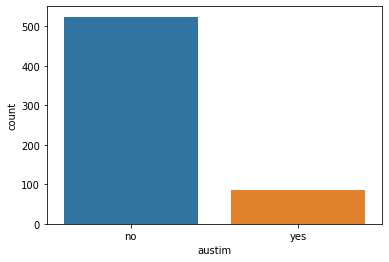

In [19]:
sea.countplot(x='austim',data=data )

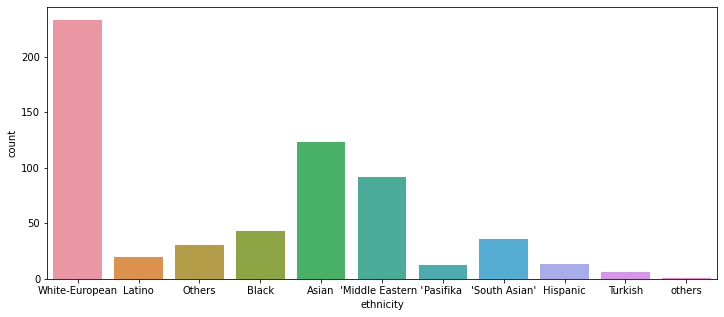

In [20]:
plt.figure(figsize=(12, 5))
sea.countplot(x='ethnicity',data=data )

In [21]:
target = data['Class/ASD']
data = data.drop('Class/ASD', axis = 1)




#Some of our models require the input data to be normalized, so I proceed to normalize the attribute data. Here, I use preprocessing.MinMaxScaler().
#Normalizing Numerical FeaturesIn addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature’s distribution (such as 'age'); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.


In [22]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'result']
data[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(data.head(n = 10))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation
0,1,1,1,1,0,0,1,1,0,0,0.024590,f,White-European,no,no,'United States',0.6,Self
1,1,1,0,1,0,0,0,1,0,1,0.019126,m,Latino,no,yes,Brazil,0.5,Self
2,1,1,0,1,1,0,1,1,1,1,0.027322,m,Latino,yes,yes,Spain,0.8,Parent
3,1,1,0,1,0,0,1,1,0,1,0.049180,f,White-European,no,yes,'United States',0.6,Self
5,1,1,1,1,1,0,1,1,1,1,0.051913,m,Others,yes,no,'United States',0.9,Self
6,0,1,0,0,0,0,0,1,0,0,0.000000,f,Black,no,no,'United States',0.2,Self
7,1,1,1,1,0,0,0,0,1,0,0.128415,m,White-European,no,no,'New Zealand',0.5,Parent
8,1,1,0,0,1,0,0,1,1,1,0.032787,m,White-European,no,no,'United States',0.6,Self
9,1,1,1,1,0,1,1,1,1,0,0.000000,m,Asian,yes,yes,Bahamas,0.8,'Health care professional'
10,1,1,1,1,1,1,1,1,1,1,0.043716,m,White-European,no,no,'United States',1.0,Relative


In [23]:
#X = pd.get_dummies(data)

In [24]:
target

0       NO
1       NO
2      YES
3       NO
5      YES
      ... 
698    YES
699    YES
700     NO
702     NO
703    YES
Name: Class/ASD, Length: 609, dtype: object

#Data Preprocessing
#From the table in Exploring the Data above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a “dummy” variable for each possible category of each non-numeric feature.

In [25]:

#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
X = pd.get_dummies(data)
display(X.head(5))


# Encode the 'all_classes_raw' data to numerical values
target= target.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(X.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

print(target)
#print(encoded)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,contry_of_res_Sweden,contry_of_res_Tonga,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_Uruguay,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
0,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


94 total features after one-hot encoding.
0      0
1      0
2      1
3      0
5      1
      ..
698    1
699    1
700    0
702    0
703    1
Name: Class/ASD, Length: 609, dtype: int64


In [26]:
from sklearn.model_selection import train_test_split

#np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size=0.7, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))



Training set has 426 samples.
Testing set has 183 samples.


# XGBOOST

XGBoost (Extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. 
It has proved to be a highly effective machine learning algorithm extensively used in machine learning competitions.
XGBoost has high predictive power and is almost 10 times faster than other gradient boosting techniques. 
It also includes a variety of regularization parameters which reduces overfitting and improves overall performance.
Hence, it is also known as regularized boosting technique.
Train the XGBoost classifier
Now, I will train the XGBoost classifier. We need to know different parameters that XGBoost provides. There are three types of parameters that we must set before running XGBoost. These parameters are as follows:-
General parameters
These parameters relate to which booster we are doing boosting. The common ones are tree or linear model.

Booster parameters
It depends on which booster we have chosen for boosting.

Learning task parameters
These parameters decide on the learning scenario. For example, regression tasks may use different parameters than ranking tasks.

Command line parameters
In addition there are command line parameters which relate to behaviour of CLI version of XGBoost.

The most important parameters that we should know about are as follows:-

learning_rate - It gives us the step size shrinkage which is used to prevent overfitting. Its range is [0,1].

max_depth - It determines how deeply each tree is allowed to grow during any boosting round.

subsample - It determines the percentage of samples used per tree. Low value of subsample can lead to underfitting.

colsample_bytree - It determines the percentage of features used per tree. High value of it can lead to overfitting.

n_estimators - It is the number of trees we want to build.
objective - It determines the loss function to be used in the process. For example, reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple models. These regularization parameters are as follows:-

gamma - It controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. It is supported only for tree-based learners.

alpha - It gives us the L1 regularization on leaf weights. A large value of it leads to more regularization.

lambda - It gives us the L2 regularization on leaf weights and is smoother than L1 regularization.

Though we are using trees as our base learners, we can also use XGBoost’s relatively less popular linear base learners and one other tree learner known as dart. We have to set the booster parameter to either gbtree (default), gblinear or dart.

In [27]:
#Now, I will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and 
#gives it acclaimed performance and efficiency gains. 

# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=target)


C:\Users\Raghu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [28]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 15,
            'learning_rate': 0.1,
            'n_estimators':400
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=15, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)


In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.000000


In [31]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

XGBoost model accuracy score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        68

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



# k-fold Cross Validation using XGBoost




To build more robust models with XGBoost, we must do k-fold cross validation. In this way, we ensure that the original training dataset is used for both training and validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation using the cv() method. In this method, we will specify several parameters which are as follows:-

nfolds - This parameter specifies the number of cross-validation sets we want to build.

num_boost_round - It denotes the number of trees we build.

metrics - It is the performance evaluation metrics to be considered during CV.

as_pandas - It is used to return the results in a pandas DataFrame.

early_stopping_rounds - This parameter stops training of the model early if the hold-out metric does not improve for a given number of rounds.

seed - This parameter is used for reproducibility of results.

We can use these parameters to build a k-fold cross-validation model by calling XGBoost's CV() method.

In [32]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=2,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

xgb_cv contains train and test auc metrics for each boosting round.



In [33]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.876999,0.011657,0.871734,0.018541
1,0.957711,0.042289,0.964788,0.035212
2,0.976187,0.018232,0.976109,0.013340
3,0.981846,0.017805,0.980573,0.017480
4,0.996386,0.002717,0.996371,0.001356


In [34]:
xgb_cv.mean()

train-auc-mean    0.975643
train-auc-std     0.010479
test-auc-mean     0.975482
test-auc-std      0.009860
dtype: float64

# SVM

In [35]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
classifier = svm.SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results

Y_Pred = classifier.predict(X_test)



In [36]:
print('SVM: {0:0.4f}'. format(accuracy_score(y_test, Y_Pred)))
print(classification_report(y_test, y_pred))

SVM: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        68

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



In [37]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2) # c is regularization factor 


In [38]:

cv_scores = cross_val_score(svc, X, target, cv=10)

cv_scores.mean()

1.0

Cross-validation:
Now instead of a single train/test split, I use K-Fold cross validation to get a better measure of your model's accuracy 

AUC Score: AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve 

In [39]:
# calculate cross-validated AUC

cross_val_score(svc, X,target, cv=10, scoring='roc_auc').mean()

1.0

F-beta score:A weighted harmonic mean between precision and recall 

In [40]:
svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

# KNN

In [41]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print('KNN: {0:0.4f}'. format(accuracy_score(y_test, Y_Pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN: 1.0000
[[111   4]
 [  7  61]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       115
           1       0.94      0.90      0.92        68

    accuracy                           0.94       183
   macro avg       0.94      0.93      0.94       183
weighted avg       0.94      0.94      0.94       183



In [43]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, X, target, cv=10)

cv_scores.mean()

0.9474590163934427

AUC Score: 

In [44]:
# calculate cross-validated AUC
cross_val_score(knn, X, target, cv=10, scoring='roc_auc').mean()

0.9930078749846192

F-beta score

In [45]:
knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9298780487804879

Choosing K is tricky, so I can't discard KNN until we've tried different values of K. Hence we write a for loop to run KNN with K values ranging from 10 to 50 and see if K makes a substantial difference.

In [46]:
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, X, target, cv=10)
    print (n, cv_scores.mean())

10 0.9474590163934427
11 0.9507377049180328
12 0.9507377049180328
13 0.9540437158469945
14 0.9507650273224044
15 0.944207650273224
16 0.9507650273224044
17 0.9507377049180328
18 0.9523770491803278
19 0.955655737704918
20 0.9523770491803278
21 0.9523770491803278
22 0.9474590163934424
23 0.9490983606557375
24 0.9507377049180326
25 0.9523770491803278
26 0.9523770491803278
27 0.9523770491803278
28 0.9507377049180326
29 0.9507377049180328
30 0.9523770491803278
31 0.9474863387978143
32 0.9491256830601094
33 0.9474863387978143
34 0.9507650273224044
35 0.9507650273224044
36 0.9507650273224042
37 0.9507650273224044
38 0.9540710382513661
39 0.9524316939890708
40 0.9524316939890708
41 0.9524316939890708
42 0.9524316939890708
43 0.9507923497267757
44 0.9507923497267757
45 0.9507923497267757
46 0.9524316939890708
47 0.9524316939890708
48 0.9557103825136611
49 0.9524316939890708



# DEEP NEURAL NETWORK


In [47]:

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [48]:
#define the keras model
model = Sequential()
model.add(Dense(94, input_dim=94, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(74, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [49]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
# fit the keras model on the dataset
h=model.fit(X_train,y_train, epochs=350, batch_size=10, verbose=0)

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 94)                8930      
_________________________________________________________________
dense_2 (Dense)              (None, 84)                7980      
_________________________________________________________________
dense_3 (Dense)              (None, 74)                6290      
_________________________________________________________________
dropout_1 (Dropout)          (None, 74)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4800      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                3250      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)               

In [52]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    


Accuracy on training data: 1.0% 
 Error on training data: 0.0
Accuracy on test data: 0.9617486596107483% 
 Error on test data: 0.03825134038925171


array([[111,   4],
       [  7,  61]], dtype=int64)

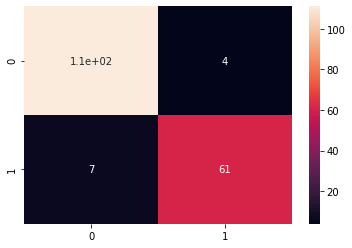

In [64]:

cm = confusion_matrix(y_test,y_pred)
sea.heatmap(cm, annot= True)
cm

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       115
           1       0.94      0.90      0.92        68

    accuracy                           0.94       183
   macro avg       0.94      0.93      0.94       183
weighted avg       0.94      0.94      0.94       183



In [66]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

183/183 [==============================] - 0s 39us/step
Accuracy: 96.17
